## Estimating the Lagrange points between the Earth and the Sun

In [31]:
import math

G  = 6.67e-11                     # the Gravitational constant (m^3/(kg s^2))
m1 = 1.989e30                     # mass of Sun (kg)
m2 = 5.9722e24                    # mass of Earth (kg)
R  = 1.52e11                      # average distance between Sun and Earth (m)

w_m2 = math.sqrt(G * m1 / R**3)   # angular velocity of Earth around Sun (rad/s)

F1_by_m = lambda l1: G * m1 / (R-l1)**2      # gravitational force per unit mass due to Sun (m/s^2)
F2_by_m = lambda l1: G * m2 / (l1)**2        # gravitational force per unit mass due to Earth (m/s^2)
F_cent_by_m = lambda l1: w_m2**2 * (R - l1)  # centrifugal force per unit mass when orbiting around Sun with Earth's angular velocity (m/s^2)

l1 = 1e4                # lower bound of the guess, starting at some small value close to Earth (m)
delta = 1e8             # how much to increment each guess (m)
upper_bound = R/2       # upper bound of the guess, starting at a large value far from Earth (m)

num_increments = 0
for i in range(20):
    print(f'Iteration {i}: start={l1}, end={upper_bound}, delta={delta}')
    while l1 < upper_bound:
        if F2_by_m(l1) + F_cent_by_m(l1) < F1_by_m(l1):
            break
        else:
            l1 += delta
    upper_bound = l1
    l1 -= delta
    delta /= 2
print(f'\nNumerical estimates show that L1 is between {l1:.2f}m and {l1 + delta:.2f}m from Earth.')

Iteration 0: start=10000.0, end=76000000000.0, delta=100000000.0
Iteration 1: start=1500010000.0, end=1600010000.0, delta=50000000.0
Iteration 2: start=1500010000.0, end=1550010000.0, delta=25000000.0
Iteration 3: start=1500010000.0, end=1525010000.0, delta=12500000.0
Iteration 4: start=1512510000.0, end=1525010000.0, delta=6250000.0
Iteration 5: start=1512510000.0, end=1518760000.0, delta=3125000.0
Iteration 6: start=1512510000.0, end=1515635000.0, delta=1562500.0
Iteration 7: start=1514072500.0, end=1515635000.0, delta=781250.0
Iteration 8: start=1514853750.0, end=1515635000.0, delta=390625.0
Iteration 9: start=1515244375.0, end=1515635000.0, delta=195312.5
Iteration 10: start=1515244375.0, end=1515439687.5, delta=97656.25
Iteration 11: start=1515342031.25, end=1515439687.5, delta=48828.125
Iteration 12: start=1515342031.25, end=1515390859.375, delta=24414.0625
Iteration 13: start=1515342031.25, end=1515366445.3125, delta=12207.03125
Iteration 14: start=1515354238.28125, end=15153664

## Plotting the forces to get a better intuition of the L1 point

/var/folders/09/klqnntcn1276dvjnp9322j840000gn/T/ipykernel_24715/822500593.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(distance_from_earth[::len(distance_from_earth)//6]) / 10**8)  # ToDo: fix this


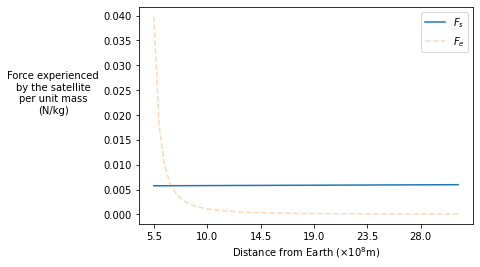

In [6]:
import numpy as np
import matplotlib.pyplot as plt

distance_from_earth = list(range(100_000_000, 3000_000_000, 50_000_000))

f1_by_m_values = [G * m1 / (R-distance)**2 for distance in distance_from_earth]
f2_by_m_values = [G * m2 / (distance)**2 for distance in distance_from_earth]
f_cent_by_m = [w_m2**2 * (R-distance) for distance in distance_from_earth]

# plt.plot(f1_by_m_values, label='Gravitational force due to the Sun')
# plt.plot(f2_by_m_values, label='Gravitational force due to the Earth', alpha=0.3, marker='-')
# plt.plot(f_cent_by_m, label='Centripetal force', alpha=0.3, marker='-')

fig, ax = plt.subplots(1, 1)
plt.plot(f1_by_m_values, label=r'$F_s$')
# plt.plot(np.array(f2_by_m_values) + np.array(f_cent_by_m), label=r'$F_e + F_{cent}$')
plt.plot(f2_by_m_values, label=r'$F_{e}$', alpha=0.3, linestyle='--')
# plt.plot(f_cent_by_m, label=r'$F_{cent}$', alpha=0.3, linestyle='--')

plt.legend()
plt.xlabel(r'Distance from Earth ($\times 10^8$m)')
# plt.xlabel(r'Distance from Earth (m)')
plt.ylabel('Force experienced\nby the satellite\nper unit mass\n(N/kg)', rotation=0, labelpad=50)
ax.set_xticklabels(np.array(distance_from_earth[::len(distance_from_earth)//6]) / 10**8)  # ToDo: fix this
plt.show()

In [32]:
distance_from_earth[20]

1500000000

## L2

In [48]:
l2 = 1e4

F1_by_m = lambda l2: G * m1 / (R+l2)**2
F2_by_m = lambda l2: G * m2 / (l2)**2
F_cent_by_m = lambda l2: w_m2**2 * (R + l2)

delta = 1e8
upper_bound = R/2
num_increments = 0

for i in range(20):
    print(f'Iteration {i}: start={l2}, end={upper_bound}, delta={delta}')
    while l2 < upper_bound:
        if F1_by_m(l2) + F2_by_m(l2) < F_cent_by_m(l2):
#             print(f'Iteration {i}: {num_increments}')
            num_increments = 0
            break
        else:
            l2 += delta
            num_increments += 1
    upper_bound = l2
    l2 -= delta
    delta /= 2
print(f'\nNumerical estimates show that L2 is between {l2} and {l2 + delta}m from the Earth.')

Iteration 0: start=10000.0, end=76000000000.0, delta=100000000.0
Iteration 1: start=1500010000.0, end=1600010000.0, delta=50000000.0
Iteration 2: start=1500010000.0, end=1550010000.0, delta=25000000.0
Iteration 3: start=1525010000.0, end=1550010000.0, delta=12500000.0
Iteration 4: start=1525010000.0, end=1537510000.0, delta=6250000.0
Iteration 5: start=1525010000.0, end=1531260000.0, delta=3125000.0
Iteration 6: start=1525010000.0, end=1528135000.0, delta=1562500.0
Iteration 7: start=1525010000.0, end=1526572500.0, delta=781250.0
Iteration 8: start=1525010000.0, end=1525791250.0, delta=390625.0
Iteration 9: start=1525400625.0, end=1525791250.0, delta=195312.5
Iteration 10: start=1525400625.0, end=1525595937.5, delta=97656.25
Iteration 11: start=1525400625.0, end=1525498281.25, delta=48828.125
Iteration 12: start=1525449453.125, end=1525498281.25, delta=24414.0625
Iteration 13: start=1525473867.1875, end=1525498281.25, delta=12207.03125
Iteration 14: start=1525486074.21875, end=15254982

So L1 ~= L2.

/var/folders/09/klqnntcn1276dvjnp9322j840000gn/T/ipykernel_53654/1249625450.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(distance_from_earth[::len(distance_from_earth)//6]) / 10**8)  # ToDo: fix this


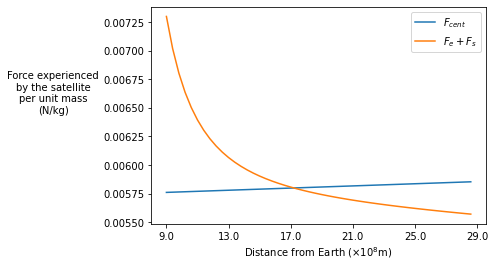

In [51]:
distance_from_earth = list(range(500_000_000, 3000_000_000, 50_000_000))

f1_by_m_values = [G * m1 / (R+distance)**2 for distance in distance_from_earth]
f2_by_m_values = [G * m2 / (distance)**2 for distance in distance_from_earth]
f_cent_by_m = [w_m2**2 * (R+distance) for distance in distance_from_earth]

# plt.plot(f1_by_m_values, label='Gravitational force due to the Sun')
# plt.plot(f2_by_m_values, label='Gravitational force due to the Earth', alpha=0.3, marker='-')
# plt.plot(f_cent_by_m, label='Centripetal force', alpha=0.3, marker='-')

fig, ax = plt.subplots(1, 1)
plt.plot(f_cent_by_m, label=r'$F_{cent}$')
plt.plot(np.array(f1_by_m_values) + np.array(f2_by_m_values), label=r'$F_e + F_{s}$')
# plt.plot(f1_by_m_values, label=r'$F_{s}$', alpha=0.3, linestyle='--')
# plt.plot(f2_by_m_values, label=r'$F_{e}$', alpha=0.3, linestyle='--')

plt.legend()
plt.xlabel(r'Distance from Earth ($\times 10^8$m)')
# plt.xlabel(r'Distance from Earth (m)')
plt.ylabel('Force experienced\nby the satellite\nper unit mass\n(N/kg)', rotation=0, labelpad=50)
ax.set_xticklabels(np.array(distance_from_earth[::len(distance_from_earth)//6]) / 10**8)  # ToDo: fix this
plt.show()

## L3

In [54]:
d = R/2

F1_by_m = lambda d: G * m1 / (d)**2
F2_by_m = lambda d: G * m2 / (R+d)**2
F_cent_by_m = lambda r: w_m2**2 * (d)

delta = 1e7
upper_bound = 3*R/2
num_increments = 0

for i in range(20):
    print(f'Iteration {i}: start={d}, end={upper_bound}, delta={delta}')
    while d < upper_bound:
        if F1_by_m(d) + F2_by_m(d) < F_cent_by_m(d):
#             print(f'Iteration {i}: {num_increments}')
            num_increments = 0
            break
        else:
            d += delta
            num_increments += 1
    upper_bound = d
    d -= delta
    delta /= 2
print(f'\nNumerical estimates show that L3 is between {d} and {d + delta}m from the Sun.')
print(f'For reference, the Earth is {R}m away from the Sun.')

Iteration 0: start=76000000000.0, end=228000000000.0, delta=10000000.0
Iteration 1: start=152000000000.0, end=152010000000.0, delta=5000000.0
Iteration 2: start=152000000000.0, end=152005000000.0, delta=2500000.0
Iteration 3: start=152000000000.0, end=152002500000.0, delta=1250000.0
Iteration 4: start=152000000000.0, end=152001250000.0, delta=625000.0
Iteration 5: start=152000000000.0, end=152000625000.0, delta=312500.0
Iteration 6: start=152000000000.0, end=152000312500.0, delta=156250.0
Iteration 7: start=152000000000.0, end=152000156250.0, delta=78125.0
Iteration 8: start=152000000000.0, end=152000078125.0, delta=39062.5
Iteration 9: start=152000000000.0, end=152000039062.5, delta=19531.25
Iteration 10: start=152000019531.25, end=152000039062.5, delta=9765.625
Iteration 11: start=152000029296.875, end=152000039062.5, delta=4882.8125
Iteration 12: start=152000034179.6875, end=152000039062.5, delta=2441.40625
Iteration 13: start=152000036621.09375, end=152000039062.5, delta=1220.70312

/var/folders/09/klqnntcn1276dvjnp9322j840000gn/T/ipykernel_53654/1131407220.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(distance_from_sun[::len(distance_from_sun)//6]) / 10**8)  # ToDo: fix this


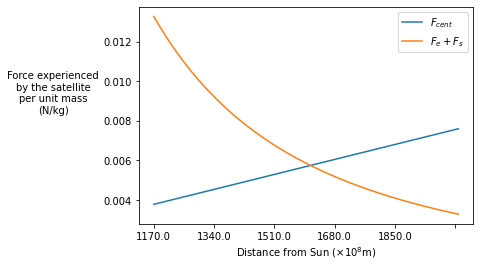

In [76]:
distance_from_sun = list(range(100_000_000_000, 202_000_000_000, 1_000_000_000))

f1_by_m_values = [G * m1 / (r)**2 for r in distance_from_sun]
f2_by_m_values = [G * m2 / (R+r)**2 for r in distance_from_sun]
f_cent_by_m = [w_m2**2 * (r) for r in distance_from_sun]

# plt.plot(f1_by_m_values, label='Gravitational force due to the Sun')
# plt.plot(f2_by_m_values, label='Gravitational force due to the Earth', alpha=0.3, marker='-')
# plt.plot(f_cent_by_m, label='Centripetal force', alpha=0.3, marker='-')

fig, ax = plt.subplots(1, 1)
plt.plot(f_cent_by_m, label=r'$F_{cent}$')
plt.plot(np.array(f1_by_m_values) + np.array(f2_by_m_values), label=r'$F_e + F_{s}$')
# plt.plot(f1_by_m_values, label=r'$F_{s}$', alpha=0.3, linestyle='--')
# plt.plot(f2_by_m_values, label=r'$F_{e}$', alpha=0.3, linestyle='--')

plt.legend()
plt.xlabel(r'Distance from Sun ($\times 10^8$m)')
# plt.xlabel(r'Distance from Earth (m)')
plt.ylabel('Force experienced\nby the satellite\nper unit mass\n(N/kg)', rotation=0, labelpad=50)
ax.set_xticklabels(np.array(distance_from_sun[::len(distance_from_sun)//6]) / 10**8)  # ToDo: fix this
plt.show()

In [74]:
distance_from_sun[::17]

[100000000000,
 117000000000,
 134000000000,
 151000000000,
 168000000000,
 185000000000]

In [75]:
distance_from_sun[-1]

201000000000

In [77]:
np.array(distance_from_sun[::len(distance_from_sun)//6]) / 10**8

array([1000., 1170., 1340., 1510., 1680., 1850.])

## Plotting all the forces

/var/folders/09/klqnntcn1276dvjnp9322j840000gn/T/ipykernel_89764/4256329405.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


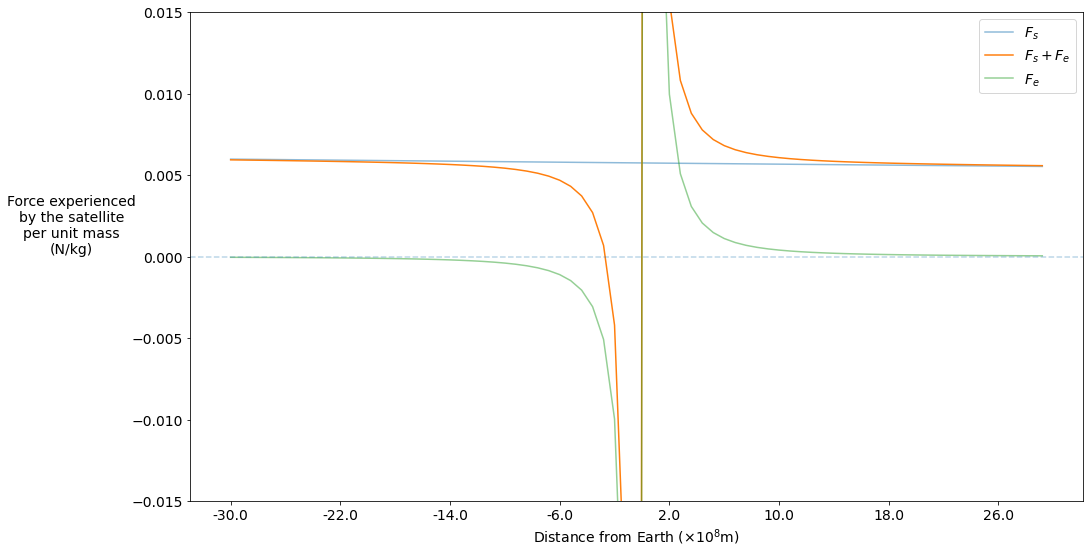

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14}) # Sets a global font size of 14

G = 6.67e-11
m1 = 1.989e30
m2 = 5.9722e24
R = 1.52e11

v_m2 = math.sqrt(G * m1 / R)
w_m2 = v_m2 / R

def sign(num):
    if num > 0:
        return 1
    elif num < 0:
        return -1
    else:
        raise Exception("0 is not allowed")


distance_from_earth = list(range(-3000_000_000, 3000_000_000, 80_000_000))

f1_by_m_values = [G * m1 / (R+distance)**2 for distance in distance_from_earth]
f2_by_m_values = [G * m2 / (distance)**2 * sign(distance) for distance in distance_from_earth]
f_cent_by_m = [f1_by_m_values[i] + f2_by_m_values[i] for i,_ in enumerate(distance_from_earth)]

# plt.plot(f1_by_m_values, label='Gravitational force due to the Sun')
# plt.plot(f2_by_m_values, label='Gravitational force due to the Earth', alpha=0.3, marker='-')
# plt.plot(f_cent_by_m, label='Centripetal force', alpha=0.3, marker='-')

fig, ax = plt.subplots(1, 1, figsize=(16,9))
plt.plot(f1_by_m_values, label=r'$F_s$', alpha=0.5, linestyle='-')
# plt.plot(np.array(f2_by_m_values) + np.array(f_cent_by_m), label=r'$F_e + F_{cent}$')
plt.plot(f_cent_by_m, label=r'$F_{s} + F_{e}$')#, alpha=0.3, linestyle='--')
plt.plot(f2_by_m_values, label=r'$F_{e}$', alpha=0.5, linestyle='-')
plt.axhline(0.0, alpha=0.3, linestyle='--')

plt.legend()
plt.xlabel(r'Distance from Earth ($\times 10^8$m)')
# plt.xlabel(r'Distance from Earth (m)')
plt.ylabel('Force experienced\nby a satellite\nper unit mass\n(N/kg)', rotation=0, labelpad=60)
plt.ylim(-0.015, 0.015)
# plt.show()
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
for i,label in enumerate(labels[1:-1]):   # the first and last label is not shown for some reason
    labels[i+1] = str(distance_from_earth[int(label)]//1e8)
ax.set_xticklabels(labels)
plt.show()

In [1]:
sign(-100)

NameError: name 'sign' is not defined

## Visualizations

In [7]:
from vpython import*

### Three planets around the sun

In [5]:
scene = canvas()

<IPython.core.display.Javascript object>

In [6]:
G = 6.67e-11
m_sun = 2e30
masses = [3.285e23, 4.867e24, 1e25]
radii = [6.8e10, 1.1e11, 1.5e11]
colors = [color.orange, color.white, color.blue]

sun = sphere(pos=vector(0,0,0), radius=radii[2]/20, color=color.yellow, make_trail=True)
planets = [sphere(pos=vector(radii[i],0,0), radius=radii[i]/30, color=colors[i], make_trail=True) for i in range(len(masses))]
num_planets = len(planets)

for i in range(num_planets):
    v = sqrt(G * m_sun / radii[i])
    planets[i].p = masses[i] * vector(0,v,0)


t = 0
dt = 100

while t<66e6:
    rate(15000)
    
    for i in range(num_planets):
        r = planets[i].pos - sun.pos
        F = -G * m_sun * masses[i] * norm(r)/ mag(r)**2
        
        planets[i].p += F * dt
        planets[i].pos += planets[i].p * dt / masses[i]
    
    t += dt

### L1 and L2 (actual)

In [3]:
scene = canvas()

G = 6.67e-11
m_sun = 2e30
m_earth = 1e25
R = 1.5e11

sun = sphere(pos=vector(0,0,0), radius=R/20, color=color.yellow, make_trail=True)
earth = sphere(pos=vector(R,0,0), radius=R/30, color=color.cyan, make_trail=True)

v_earth = sqrt(G * m_sun / R)
earth.p = m_earth * vector(0,-v_earth,0)
w_earth = v_earth / R

t = 0
dt = 100

l1 = R - R * (m_earth / (3 * m_sun))**0.34
l2 = R + R * (m_earth / (3 * m_sun))**0.34
ball1 = sphere(pos=vector(l1,0,0), radius=R/60, make_trail=True)
ball2 = sphere(pos=vector(l2,0,0), radius=R/60, make_trail=True)
ball1.m=1000
ball2.m=1000
# ball2_v = (G*m1/(r1+l2))**(0.5)
ball1.p = ball1.m * vector(0,-w_earth * l1,0)
ball2.p = ball2.m * vector(0,-w_earth * l2,0)
# ball2.p = ball2.m*vector(0,-ball2_v,0)

while t<38e6:
    rate(15000)

    # print(earth.p, ball1.p, ball2.p)

    r = earth.pos - sun.pos

    r1_sun = ball1.pos - sun.pos
    r1_earth = ball1.pos - earth.pos

    r2_sun = ball2.pos - sun.pos
    r2_earth = ball2.pos - earth.pos
  
    F = -G * m_sun * m_earth * norm(r) / mag(r)**2

    F1_sun = -G * m_sun * ball1.m * norm(r1_sun) / mag(r1_sun)**2
    F1_earth = -G * m_earth * ball1.m * norm(r1_earth) / mag(r1_earth)**2

    F2_sun = -G * m_sun * ball2.m * norm(r2_sun) / mag(r2_sun)**2
    F2_earth = -G * m_earth * ball2.m * norm(r2_earth) / mag(r2_earth)**2
    
    ball1.p += (F1_sun + F1_earth) * dt
    ball2.p += (F2_sun + F2_earth) * dt
    earth.p += F * dt

    ball1.pos += ball1.p * dt / ball1.m
    ball2.pos += ball2.p * dt / ball2.m
    earth.pos += earth.p * dt / m_earth
        
    t = t + dt

<IPython.core.display.Javascript object>

### L1 and L2

In [26]:
scene = canvas()

G = 6.67e-11
m_sun = 2e30
m_earth = 1e25
R = 1.5e11

sun = sphere(pos=vector(0,0,0), radius=R/20, color=color.yellow, make_trail=False)
earth = sphere(pos=vector(R,0,0), radius=R/30, color=color.cyan, make_trail=True)

v_earth = sqrt(G * m_sun / R)
earth.p = m_earth * vector(0,-v_earth,0)
w_earth = v_earth / R

t = 0
dt = 100

l1 = 0.8 * R
l2 = 1.2 * R
ball1 = sphere(pos=vector(l1,0,0), radius=R/60, make_trail=False)
ball2 = sphere(pos=vector(l2,0,0), radius=R/60, make_trail=False)
ball1.m=1000
ball2.m=1000
# ball2_v = (G*m1/(r1+l2))**(0.5)
ball1.p = ball1.m * vector(0,-w_earth * l1,0)
ball2.p = ball2.m * vector(0,-w_earth * l2,0)
# ball2.p = ball2.m*vector(0,-ball2_v,0)

# label_earth = label(pos=earth.pos, text="Earth", xoffset=10, yoffset=10, box=False, linecolor=color.black)
label_ball1 = label(pos=ball1.pos, text="L1", xoffset=-10, yoffset=0, box=False, linecolor=color.black, opacity=0)
label_ball2 = label(pos=ball2.pos, text="L2", xoffset=10, yoffset=0, box=False, linecolor=color.black)


while t<32e6:
    rate(15000)

    r = earth.pos - sun.pos  
    F = -G * m_sun * m_earth * norm(r) / mag(r)**2

    earth.p += F * dt
    ball1.p = earth.p / m_earth * ball1.m * 0.8
    ball2.p = earth.p / m_earth * ball2.m * 1.2

    ball1.pos += ball1.p * dt / ball1.m
    ball2.pos += ball2.p * dt / ball2.m
    earth.pos += earth.p * dt / m_earth

    label_ball1.pos = ball1.pos
    label_ball2.pos = ball2.pos
    if t > 9e6 and t < 22e6:
        label_ball1.visible = False
        label_ball2.visible = False
    else:
        label_ball1.visible = True
        label_ball2.visible = True
        
    t = t + dt

<IPython.core.display.Javascript object>

### L3

In [26]:
scene = canvas()

G = 6.67e-11
m1 = 2e30
m2 = 1e25
R = 1.5e11

r1 = m2*R/(m1+m2)
r2 = m1*R/(m1+m2)

v1 = sqrt(G*m2*r1/R**2)
v2 = sqrt(G*m1*r2/R**2)
w = v2/r2

star1=sphere(pos=vector(-r1,0,0), radius=R/20, color=color.yellow, make_trail=True)
star2=sphere(pos=vector(r2,0,0), radius=R/30, color=color.cyan, make_trail=True)
star1.p = m1*vector(0,v1,0)
star2.p = m2*vector(0,-v2,0)

t = 0
dt = 500


l2 = r2 + R * (m2/(3*m1))**0.34
ball2 = sphere(pos=vector(l2,0,0), radius=R/60, make_trail=True)
ball2.m=1000
# ball2_v = (G*m1/(r1+l2))**(0.5)
ball2.p = ball2.m*vector(0,-w*l2,0)
# ball2.p = ball2.m*vector(0,-ball2_v,0)


l3 = -2*r1 - r2
ball3 = sphere(pos=vector(l3,0,0), radius=R/60, make_trail=True)
ball3.m=1000
ball3.p = ball3.m*vector(0,-w*ball3.pos.x,0)



while t<33e6:
  rate(15000)
  
  r = star2.pos - star1.pos
  
  r21 = ball2.pos-star1.pos
  r22 = ball2.pos-star2.pos
  
  r31 = ball3.pos-star1.pos
  r32 = ball3.pos-star2.pos
  
  F = -G*m1*m2*norm(r)/mag(r)**2
  
  F21 = -G*m1*ball2.m*norm(r21)/mag(r21)**2
  F22 = -G*m2*ball2.m*norm(r22)/mag(r22)**2
  
  F31 = -G*m1*ball3.m*norm(r31)/mag(r31)**2
  F32 = -G*m2*ball3.m*norm(r32)/mag(r32)**2

  ball2.p = ball2.p + (F21+F22)*dt
  ball3.p = ball3.p + (F31+F32)*dt
  
  star2.p = star2.p + F*dt
  star1.p = star1.p - F*dt
  
  ball2.pos = ball2.pos + ball2.p*dt/ball2.m
  ball3.pos = ball3.pos + ball3.p*dt/ball3.m
  
  star1.pos = star1.pos + star1.p*dt/m1
  star2.pos = star2.pos + star2.p*dt/m2
  
  t = t + dt

<IPython.core.display.Javascript object>

### New heading